In [1]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print(train_images.shape)		  # (60000, 28, 28)
print(test_images.shape)			# (10000, 28, 28)

(60000, 28, 28)
(10000, 28, 28)


In [2]:
# 첫 번째 데이터를  본다
print(test_images[1])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 116 125 171 255 255 150  93   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 169 253 253 253 253 253 253 218  30
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 169 253 253 253 213 142 176 253 253 122
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  52 250 253 210  32  12   0   6 206 253 140
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  77 251 210  25   0   0   0 122 248 253  65
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  31  18   0   0   0   0 209 25

In [3]:
# 출력 설정
# 데이터의 타입을 확인한다
print(type(test_images))

# 넘파이 배열 하나의 행을 한 줄에서 보도록 설정한다
# linewidth : 한 줄에 출력할 문자의 최대 수
import numpy as np
np.set_printoptions(linewidth=np.inf)

<class 'numpy.ndarray'>


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 116 125 171 255 255 150  93   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 169 253 253 253 253 253 253 218  30   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 169 253 253 253 213 142 176 253 253 122   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  52 250 253 210  32  12   0   6 206 253 140   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  77 251 210  25   0   0   0 122 248 253  65   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  31  18   0   0   0   0 209 253 253  65   0   

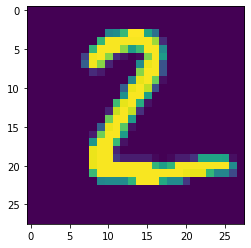

In [4]:
# 재출력
print(test_images[1])


# 각 셀의 숫자는 0~255의 색상값이다.
# 컬러로 출력을 해본다
import matplotlib.pyplot as plt
plt.imshow(test_images[1])

In [ ]:
print(test_images)

In [15]:
# 데이터 슬라이싱
# 특정 구간의 데이터만 가져와 본다
my_slice = test_images[0:100]		  # 0~99번까지 가져온다
print(my_slice.shape)				      # (100, 28, 28)

# 3차원 데이터이므로, 위의 코드는 다음과도 동일하다
my_slice = test_images[0:100, 0:28, 0:28]
my_slice = test_images[0:100, :, :]

(100, 28, 28)


In [16]:
# Label 정보 출력
print(len(train_labels))		# 60000
print(len(test_labels))		  # 10000

print(train_labels)				  # array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)
print(test_labels)				  # array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

60000
10000
[5 0 4 ... 5 6 8]
[7 2 1 ... 4 5 6]


In [ ]:
# Layer 쌓기
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()                       # 모델 초기화

# 은닉층 설정. 512개의 유닛을 갖는 은닉층을 설정한다. 처음 입력부분은 shape를 맞춰야 한다
model.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))

# 출력층 설정. 숫자의 종류가 10개이므로, 10개의 유닛을 갖는 출력층을 설정한다. 10개 각각에 대한 확률정보 출력. Softmax 층은 확률 점수를 출력한다
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [20]:
# 데이터 전처리
print("전처리 전")
print(test_images[1,])


# 데이터 변환
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32')/255

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32')/255


print("\n전처리 후")
np.set_printoptions(linewidth=310)
print(test_images[1])

전처리 전
[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.

In [ ]:
# 종속변수를 범주형으로 변환
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
# 데이터 학습
model.fit(train_images, train_labels, epochs=5, batch_size=128)

In [ ]:
# 예측
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc:', test_acc)					# 0.9781